# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

# Download dataset from Kaggle

In [ ]:
#set kaggle API credentials
import os
os.environ['KAGGLE_USERNAME']='badugubhavana'
os.environ['KAGGLE_KEY']='ab8a290126290bd74ba12a860c9f8dd5'

In [ ]:
#download dataset
! kaggle datasets download -d uciml/breast-cancer-wisconsin-data

breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#unzip file
! unzip /content/breast-cancer-wisconsin-data.zip

Archive:  /content/breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Load & Explore Data

In [ ]:
#load data on dataframe
df=pd.read_csv('/content/data.csv')


In [ ]:
#display dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#count of rows and columns
df.shape

(569, 33)

In [ ]:
#count number of null(empty) values
df.isna().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Drop the column with null values
df.dropna(axis=1,inplace=True)

In [ ]:
# count of rows and columns
df.shape

(569, 32)

In [ ]:
#Get count of number of M or B cells in diagnosis
df['diagnosis'].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

# Label Encoding

In [ ]:
#Get Datatypes of each column in our dataset
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
#Encode the diagnosis values
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df.iloc[:,1]=labelencoder.fit_transform(df.iloc[:,1].values)
#df.iloc[:,1].values

In [ ]:
#display df
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Visualization

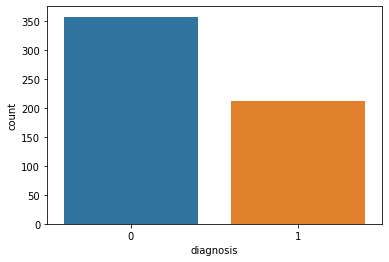

In [ ]:
sns.countplot(x='diagnosis',data=df)

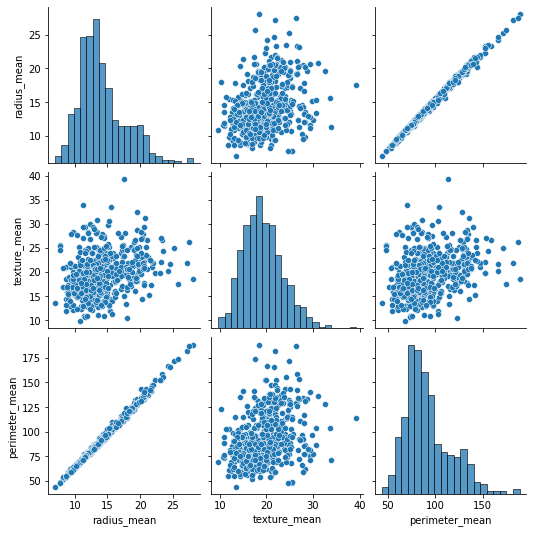

In [ ]:
sns.pairplot(df.iloc[:,2:5])

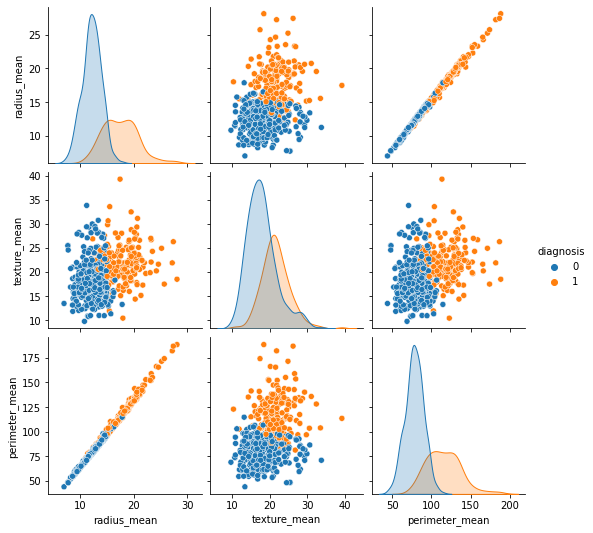

In [ ]:
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')

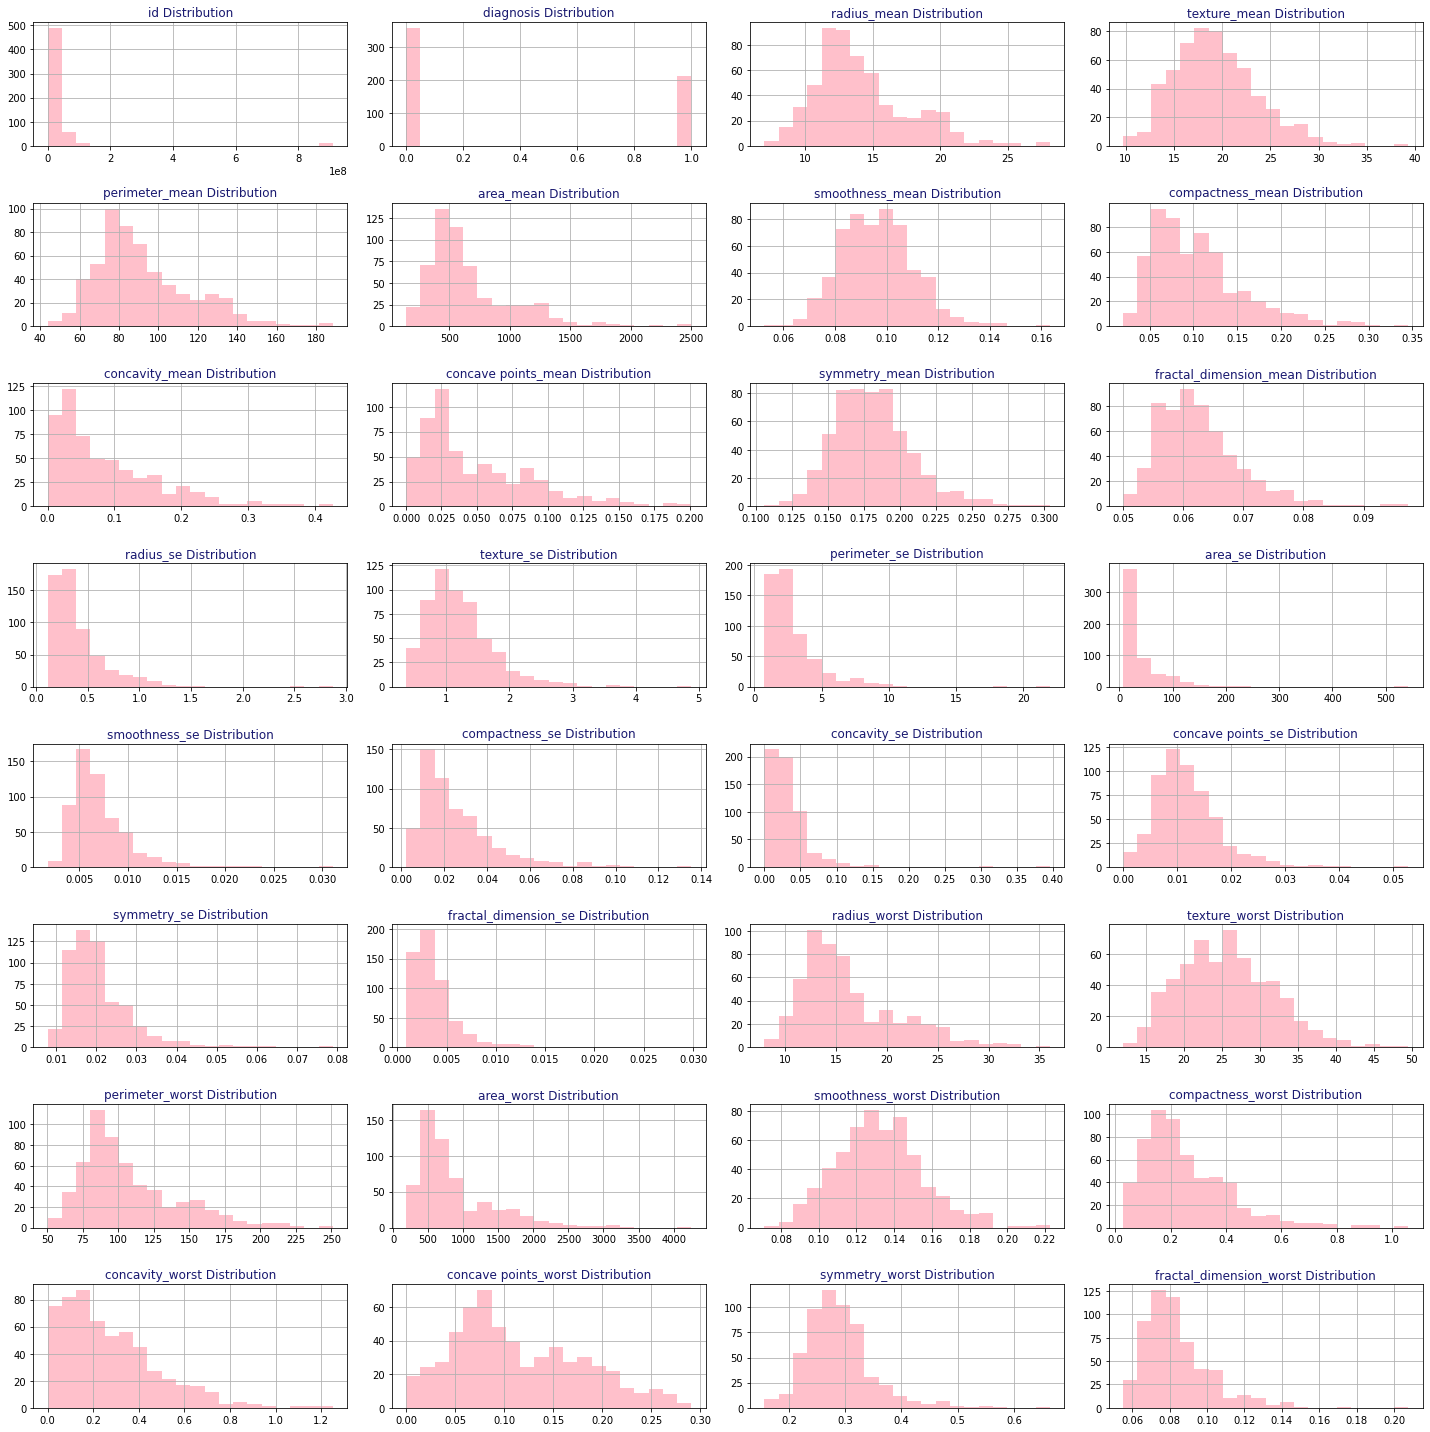

In [ ]:
def draw_histogram(df, features, rows, cols):
  fig = plt.figure(figsize=(20,20))
  for i, feature in enumerate(features):
    ax = fig.add_subplot(rows,cols,i+1)
    df[feature].hist(bins=20,ax=ax,facecolor='pink') 
    ax.set_title(feature + " Distribution",color='midnightblue')
  fig.tight_layout()
  plt.show()
  print('\n\n')
draw_histogram(df,df.columns,8,4)

# Split Dataset & Feature Scaling

In [ ]:
#Splitting the dataset into independent and dependent datasets 
X=df.iloc[:,2:].values
Y=df.iloc[:,1].values

In [ ]:
#Splitting datasets into training(75%) and testing(25%)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [ ]:
#Scaling the data(feature scaling)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [ ]:
#print data
X_train

array([[-0.22015076, -1.2763428 , -0.23298755, ..., -0.33340335,
        -0.25129334, -0.58943415],
       [-1.20841463, -0.23952411, -1.24573321, ..., -1.73847003,
        -1.58497337, -1.00861152],
       [-0.35339982, -0.41463126, -0.34371872, ..., -0.4677371 ,
        -1.45757225, -0.73650427],
       ...,
       [ 0.1129719 ,  0.50698535,  0.10890504, ...,  0.13791358,
         0.20670561, -0.85052492],
       [-0.60324181, -1.06206694, -0.54335813, ..., -0.81299168,
        -0.26580739,  1.08507199],
       [-0.04803738, -0.60817075, -0.10447473, ..., -0.78542033,
        -0.34321566, -0.38122253]])

# Build a Logistic Regression Model

In [ ]:
#build a logistic regression classifier
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#make use of trained model to make predictions on test data
predictions=classifier.predict(X_test)

# Performance Evaluation

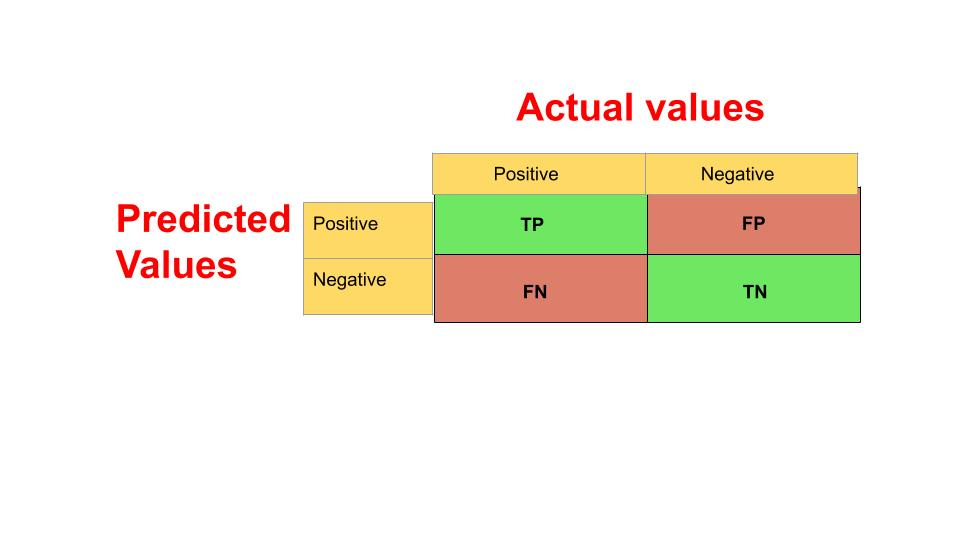

[[68  0]
 [ 1 45]]


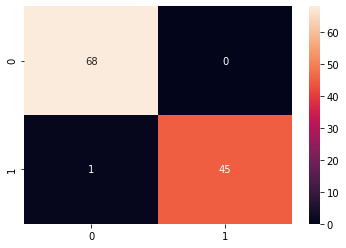

In [ ]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm=confusion_matrix(Y_test,predictions)
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
#get accuracy score for model
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.9912280701754386


In [ ]:
print(Y_test)

[1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0
 0 0 0]


In [ ]:
print(predictions)

[1 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0
 0 0 0]
